In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

In [22]:
#create Data of two point clouds in the plane with center (1,1) and (-1,-1)
n = 50
#c1 = np.array([1+np.random.randn(n), 1+np.random.randn(n)])
c1 = np.random.normal(1, 0.5, (50, 2))
c1 = np.hstack((c1, np.ones((50,1))))

c2 = np.random.normal(-1, 0.5, (50, 2))
c2 = np.hstack((c2, np.zeros((50,1))))

data = np.vstack((c1, c2))
#data

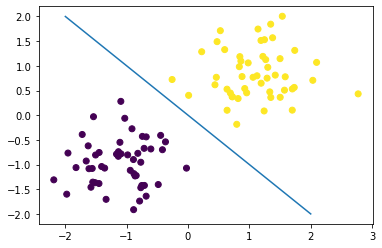

In [23]:
#Plot Data with separating line y = -x
plt.scatter(data[:,0], data[:,1], c = data[:,2])
plt.plot(np.linspace(-2,2, 20), -1*np.linspace(-2,2, 20))

In [24]:
def sig_act(s):
    '''activation function'''
    return 1.0/(1.0+np.exp(-s))

#define separating line by hand y=kx+d
k = -1
d = 0
#calculate class prediction with specified line c_hat = sig(y - kx -d)
c_hat = sig_act((data[:,1] - (k*data[:,0] + d))/(np.sqrt((k**2)+1)))

L = np.sum((data[:,2] - c_hat)**2)
L

4.91675666380344

In [25]:
def Loss(k, d):
    '''returns Loss for provided separation line'''
    
    #calculate class prediction with specified line c_hat = sig(y - kx -d)
    c_hat = sig_act(data[:,1] - (k*data[:,0] + d))

    return np.sum((data[:,2] - c_hat)**2)


In [26]:
def grid_points(rectangle,delx):
    a = rectangle[0]; b=rectangle[1]; c=rectangle[2]; d=rectangle[3]
    x1 = np.arange(a, b+delx, delx)
    x2 = np.arange(c, d+delx, delx)
    x1grid, x2grid = np.meshgrid(x1, x2)
    return x1grid,x2grid

In [27]:
def Gaussian_prior(mu_k,var_k,mu_d,var_d,grid) :
    rv = multivariate_normal([mu_k,mu_d],np.array([[var_k,0],[0,var_d]]))
    x, y = grid
    pos = np.dstack((x, y))
    return rv.pdf(pos)

grid = grid_points([-30, 30, -5, 5], 0.1)
Prior = Gaussian_prior(-1,4,0,9,grid)

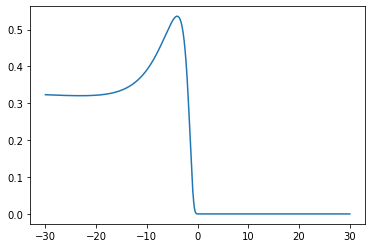

In [28]:
#marginal posterior of k: p(k|D,d) (Uniform prior)
k_grid = np.linspace(-30, 30, 600)
L = []
for k in k_grid:
    L.append(Loss(k, 0))

plt.plot(k_grid, np.exp(-np.array(L)))

# Could produce marginals from the posterior rather than independently

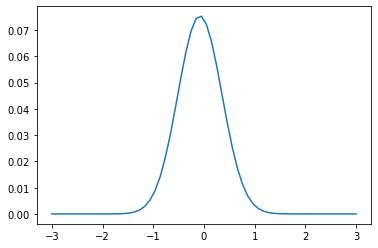

In [29]:
#marginal posterior of d: p(d|D,k) (Uniform prior)
d_grid = np.linspace(-3, 3, 60)
L = []
for d in d_grid:
    L.append(Loss(-1, d))

plt.plot(d_grid, np.exp(-np.array(L)))

# Could produce marginals from the posterior rather than independently

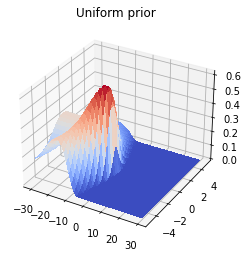

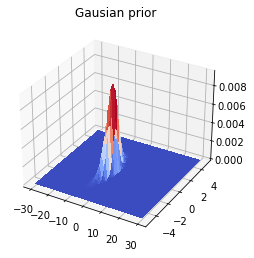

In [30]:
#Full posterior p(k,d | D)

k_grid, d_grid = grid_points([-30, 30, -5, 5], 0.1)
dims = np.shape(k_grid)
n1 = dims[0]; n2 = dims[1]
L_grid = np.zeros((n1,n2))
for i in range(n1):
    for j in range(n2):
        L_grid[i,j] = Loss(k_grid[i,j], d_grid[i,j])

# Uniform prior
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(k_grid, d_grid, np.exp(-1*L_grid)*1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('Uniform prior')
plt.show()

# Gausian prior
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(k_grid, d_grid, np.exp(-1*L_grid)*Prior, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('Gausian prior')
plt.show()